<a href="https://colab.research.google.com/github/Thiru08V/CS19P18_DLC-LAB_210701290/blob/main/EX_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECT DETECTION WITH YOLO3

In [23]:
# Import necessary libraries
import cv2
import numpy as np
import tensorflow as tf

In [24]:
# Step 1: Load the pre-trained YOLOv3 model and COCO class labels
# Download and load the YOLOv3 weights and configuration
model_config_path = "yolov3.cfg"  # Download this from YOLO official repo
model_weights_path = "yolov3.weights"  # Pre-trained YOLOv3 weights (can be found online)

In [25]:
# Load YOLOv3 model
net = cv2.dnn.readNetFromDarknet(model_config_path, model_weights_path)

In [26]:
# Load COCO labels
labels_path = "coco.names"  # Download from YOLO's official repo
with open(labels_path, 'r') as f:
    labels = f.read().strip().split('\n')

In [27]:
# Step 2: Preprocessing and loading the dataset (here using an input image)
# Load an image (you can use your own dataset for testing)
image = cv2.imread('3zebra.jpg')
(H, W) = image.shape[:2]

In [29]:
# Determine the output layer names of YOLO
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [30]:
# Step 3: Perform a forward pass through YOLOv3 to get bounding boxes and confidence scores
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layer_outputs = net.forward(output_layers)

In [31]:
# Step 4: Extract detection results
boxes = []
confidences = []
class_ids = []

In [32]:
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter out weak predictions
        if confidence > 0.5:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [33]:
# Step 5: Apply Non-Maximum Suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [34]:
# Step 6: Draw bounding boxes on the image
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        color = [int(c) for c in np.random.randint(0, 255, size=(3,))]
        label = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"

        # Draw bounding box and label
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

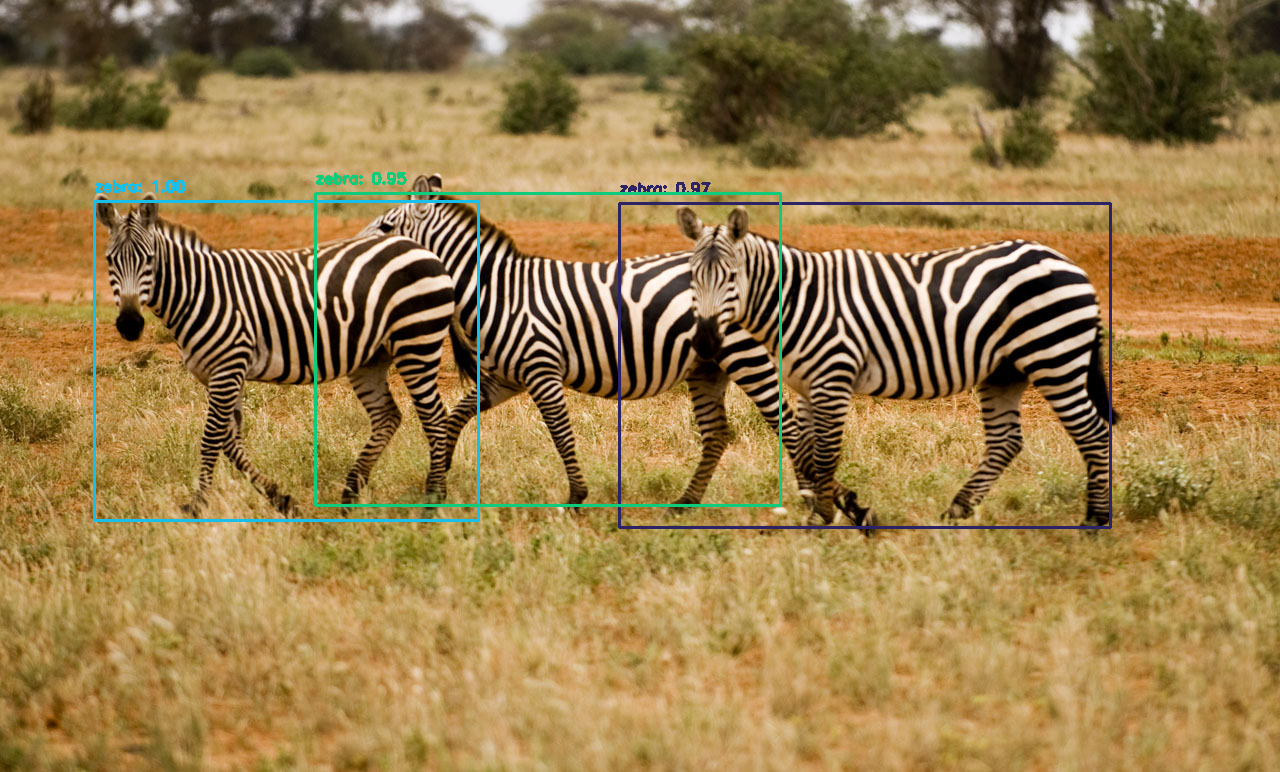

In [36]:
from google.colab.patches import cv2_imshow

# Display the output image with detected objects
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()